In [1]:
import pandas as pd
sidemen_statistics_path = 'MoreSidemen_video_statistics.csv'
sidemen_comments_path = 'MoreSidemen_video_comments.csv'

df_statistics = pd.read_csv(sidemen_statistics_path)
df_comments = pd.read_csv(sidemen_comments_path)

In [2]:
df_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video ID      501 non-null    object
 1   Title         501 non-null    object
 2   Published At  501 non-null    object
 3   Views         501 non-null    int64 
 4   Likes         501 non-null    int64 
 5   Dislikes      501 non-null    int64 
 6   Comments      501 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [3]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49253 entries, 0 to 49252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Video ID    49253 non-null  object
 1   Comment     49253 non-null  object
 2   Author      49253 non-null  object
 3   Like Count  49253 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [4]:
df_statistics.head()

,Video ID,Title,Published At,Views,Likes,Dislikes,Comments
0,VeRPzUT4Qv0,SIDEMEN PRO CLUBS BUT THERE’S AN IMPOSTER,2024-01-04T18:00:14Z,1589899,70318,0,1694
1,H_ezm4iDEc4,SIDEMEN SAVAGELY RANK THEMSELVES,2024-01-02T21:33:18Z,2161170,74787,0,2150
2,tND6QdKBk84,SIDEMEN GUESS THE LYRIC: CHRISTMAS EDITION,2023-12-30T20:00:30Z,1390029,56892,0,696
3,uqv-oC-Izi8,SIDEMEN AMONG US BUT THE IMPOSTERS HAVE MAGIC ...,2023-12-28T17:30:07Z,4129987,176538,0,3378
4,j7HNpGxBw4I,SIDEMEN CHRISTMAS MUKBANG,2023-12-26T15:50:37Z,1959241,82725,0,1564


In [5]:
df_statistics['Published At'] = pd.to_datetime(df_statistics['Published At'])

In [6]:
df_statistics['Title'] = df_statistics['Title'].astype(str).str.lower()

In [7]:
df_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Video ID      501 non-null    object             
 1   Title         501 non-null    object             
 2   Published At  501 non-null    datetime64[ns, UTC]
 3   Views         501 non-null    int64              
 4   Likes         501 non-null    int64              
 5   Dislikes      501 non-null    int64              
 6   Comments      501 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 27.5+ KB


In [8]:
print(df_statistics.isnull().sum())

Video ID        0
Title           0
Published At    0
Views           0
Likes           0
Dislikes        0
Comments        0
dtype: int64


In [9]:
df_statistics['Engagement Rate'] = ((df_statistics['Likes'] + df_statistics['Comments']) / df_statistics['Views']) * 100

In [10]:
df_statistics.head()

,Video ID,Title,Published At,Views,Likes,Dislikes,Comments,Engagement Rate
0,VeRPzUT4Qv0,sidemen pro clubs but there’s an imposter,2024-01-04 18:00:14+00:00,1589899,70318,0,1694,4.529344
1,H_ezm4iDEc4,sidemen savagely rank themselves,2024-01-02 21:33:18+00:00,2161170,74787,0,2150,3.559970
2,tND6QdKBk84,sidemen guess the lyric: christmas edition,2023-12-30 20:00:30+00:00,1390029,56892,0,696,4.142935
3,uqv-oC-Izi8,sidemen among us but the imposters have magic ...,2023-12-28 17:30:07+00:00,4129987,176538,0,3378,4.356333
4,j7HNpGxBw4I,sidemen christmas mukbang,2023-12-26 15:50:37+00:00,1959241,82725,0,1564,4.302125


In [11]:
if (df_statistics['Dislikes'] == 0).all():
    df_statistics = df_statistics.drop(columns=['Dislikes'])

In [12]:
df_statistics.head()

,Video ID,Title,Published At,Views,Likes,Comments,Engagement Rate
0,VeRPzUT4Qv0,sidemen pro clubs but there’s an imposter,2024-01-04 18:00:14+00:00,1589899,70318,1694,4.529344
1,H_ezm4iDEc4,sidemen savagely rank themselves,2024-01-02 21:33:18+00:00,2161170,74787,2150,3.559970
2,tND6QdKBk84,sidemen guess the lyric: christmas edition,2023-12-30 20:00:30+00:00,1390029,56892,696,4.142935
3,uqv-oC-Izi8,sidemen among us but the imposters have magic ...,2023-12-28 17:30:07+00:00,4129987,176538,3378,4.356333
4,j7HNpGxBw4I,sidemen christmas mukbang,2023-12-26 15:50:37+00:00,1959241,82725,1564,4.302125


/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


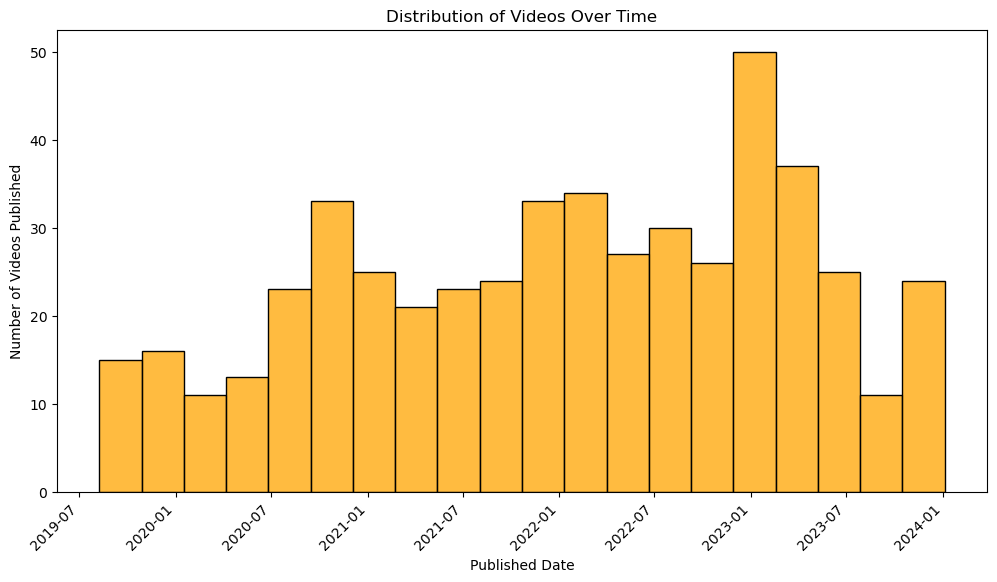

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 6))
sns.histplot(df_statistics['Published At'], bins=20, kde=False, color='orange', edgecolor='black')
plt.title('Distribution of Videos Over Time')
plt.xlabel('Published Date')
plt.ylabel('Number of Videos Published')
plt.xticks(rotation=45, ha='right')
plt.show()

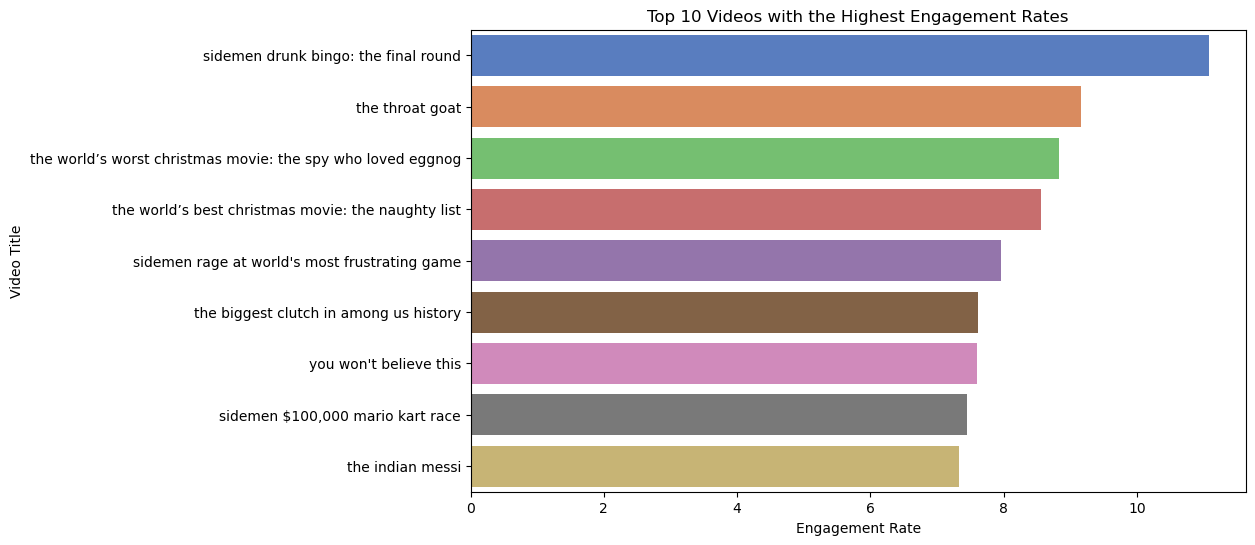

In [51]:
# Get the top 10 videos with the most engagement rates
top_engagement_videos = df_statistics.nlargest(10, 'Engagement Rate')

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Engagement Rate', y='Title', data=top_engagement_videos, palette='muted')
plt.title('Top 10 Videos with the Highest Engagement Rates')
plt.xlabel('Engagement Rate')
plt.ylabel('Video Title')
plt.show()


/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

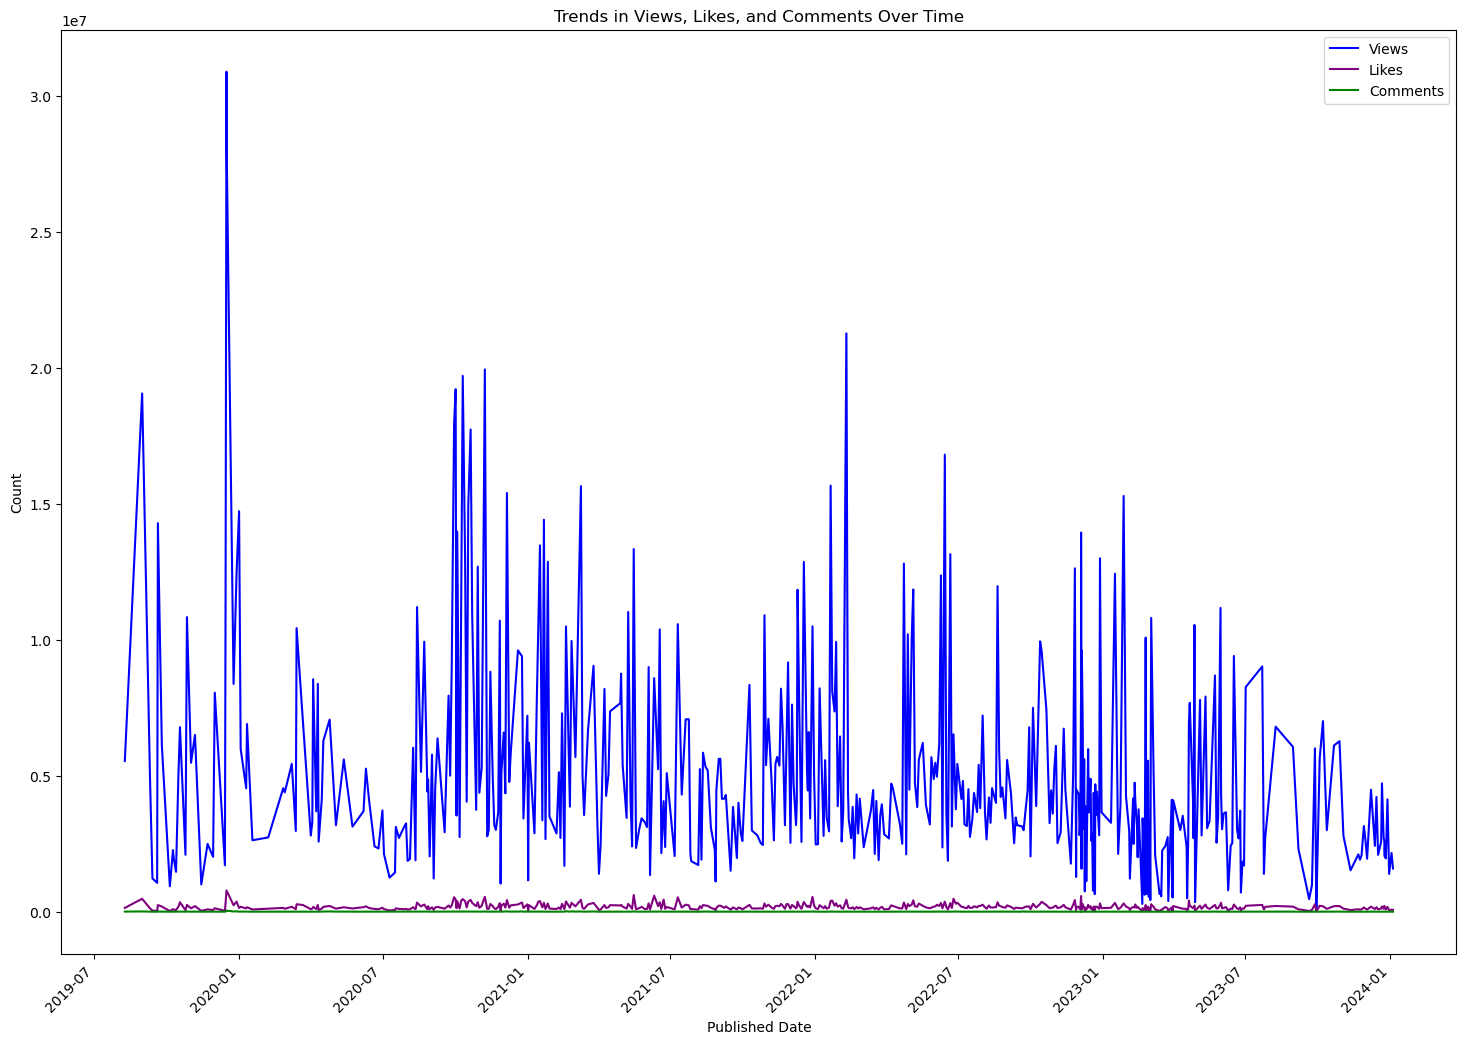

In [14]:
plt.figure(figsize=(18, 12))
sns.lineplot(x='Published At', y='Views', data=df_statistics, label='Views', color='blue')
sns.lineplot(x='Published At', y='Likes', data=df_statistics, label='Likes', color='purple')
sns.lineplot(x='Published At', y='Comments', data=df_statistics, label='Comments', color='green')
plt.title('Trends in Views, Likes, and Comments Over Time')
plt.xlabel('Published Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

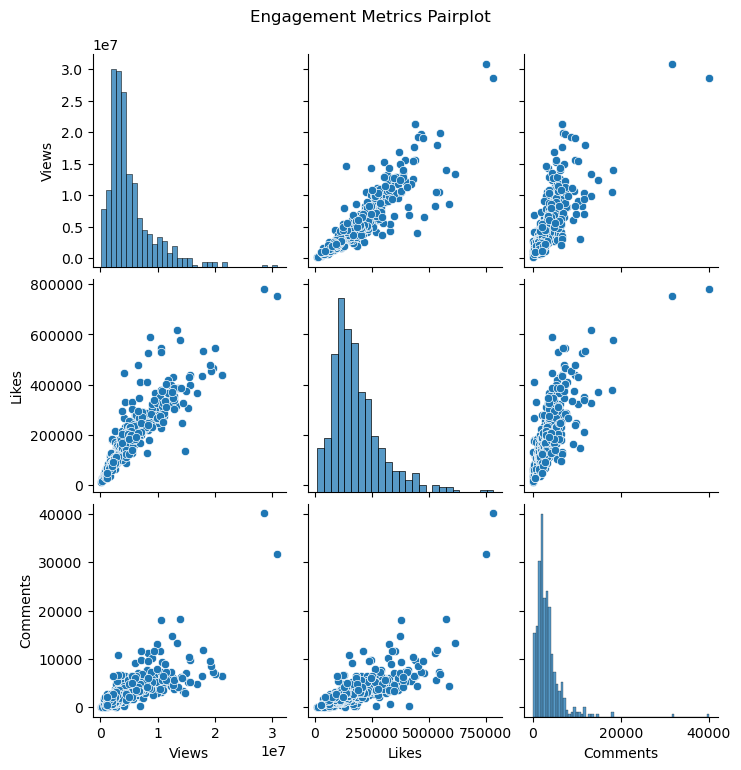

In [15]:
plt.figure(figsize=(14, 8))
sns.pairplot(df_statistics[['Views', 'Likes', 'Comments']])
plt.suptitle('Engagement Metrics Pairplot', y=1.02)
plt.show()

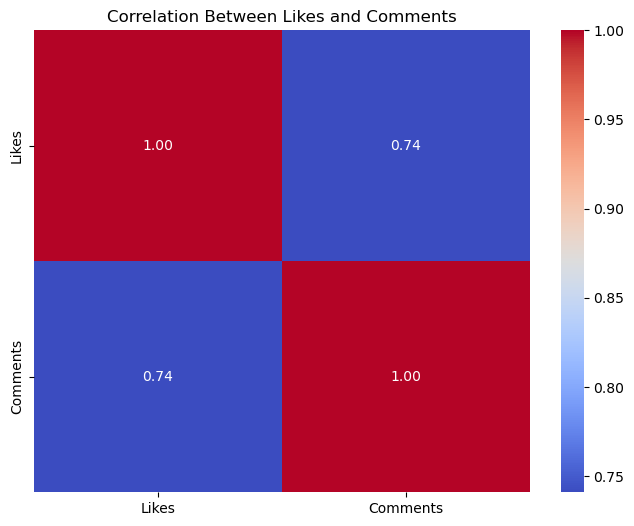

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_statistics[['Likes', 'Comments']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Likes and Comments')
plt.show()

In [17]:
top_videos_views = df_statistics.nlargest(15, 'Views')
top_videos_likes = df_statistics.nlargest(15, 'Likes')
top_videos_comments = df_statistics.nlargest(15, 'Comments')

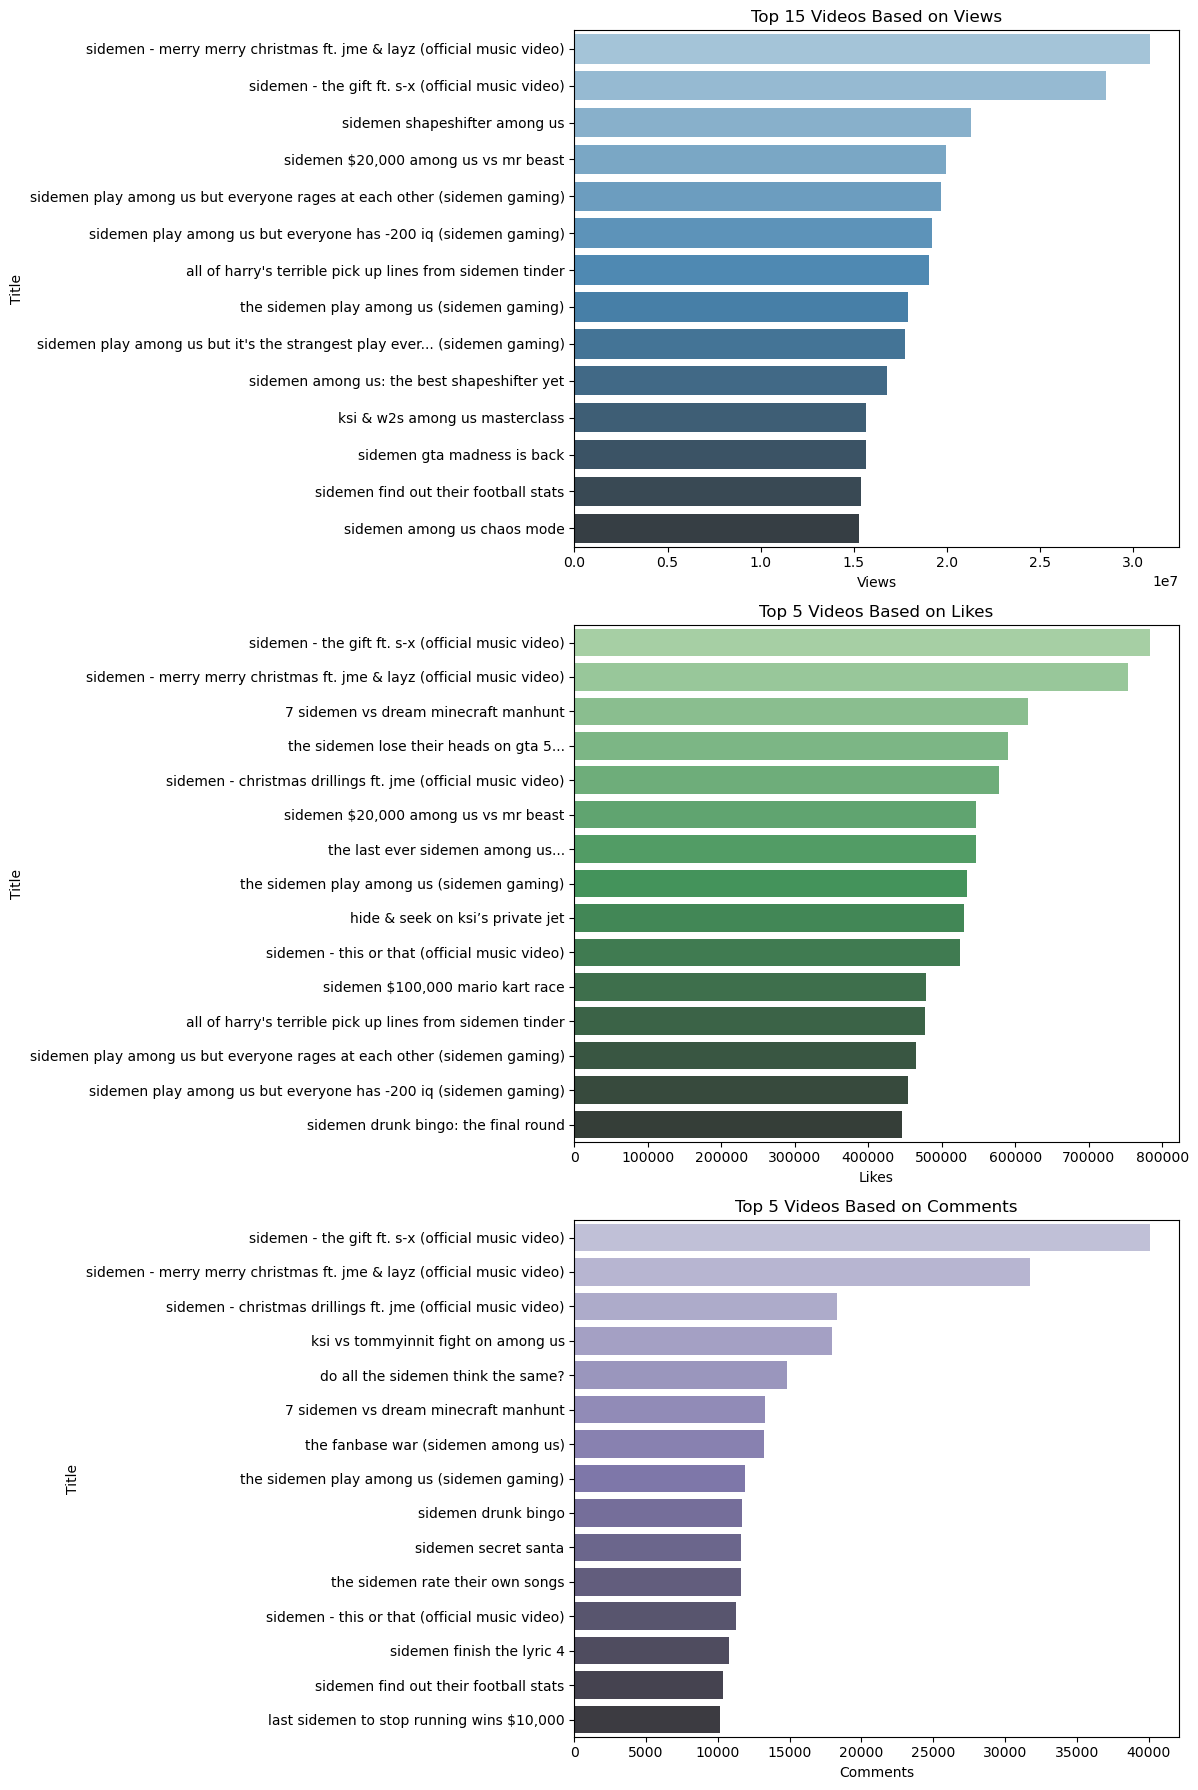

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x='Views', y='Title', data=top_videos_views, palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 15 Videos Based on Views')

sns.barplot(x='Likes', y='Title', data=top_videos_likes, palette='Greens_d', ax=axes[1])
axes[1].set_title('Top 5 Videos Based on Likes')

sns.barplot(x='Comments', y='Title', data=top_videos_comments, palette='Purples_d', ax=axes[2])
axes[2].set_title('Top 5 Videos Based on Comments')

plt.tight_layout()
plt.show()

In [19]:
df_statistics.head()

,Video ID,Title,Published At,Views,Likes,Comments,Engagement Rate
0,VeRPzUT4Qv0,sidemen pro clubs but there’s an imposter,2024-01-04 18:00:14+00:00,1589899,70318,1694,4.529344
1,H_ezm4iDEc4,sidemen savagely rank themselves,2024-01-02 21:33:18+00:00,2161170,74787,2150,3.559970
2,tND6QdKBk84,sidemen guess the lyric: christmas edition,2023-12-30 20:00:30+00:00,1390029,56892,696,4.142935
3,uqv-oC-Izi8,sidemen among us but the imposters have magic ...,2023-12-28 17:30:07+00:00,4129987,176538,3378,4.356333
4,j7HNpGxBw4I,sidemen christmas mukbang,2023-12-26 15:50:37+00:00,1959241,82725,1564,4.302125


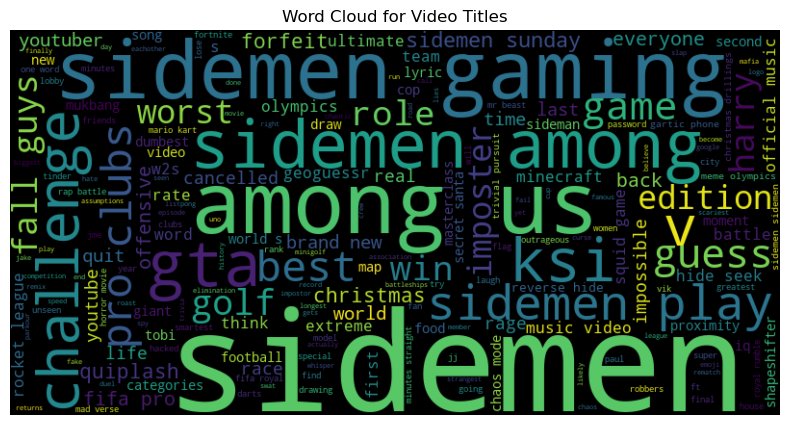

In [20]:
from wordcloud import WordCloud

# Combine all titles into one string
titles_text = ' '.join(df_statistics['Title'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Video Titles')
plt.show()

In [21]:
# Text Analysis to identify football-related videos
football_keywords = ['football', 'crossbar', 'penalties', 'freekick', 'team', 'arsenal', 'mancity']

# Create a new column indicating whether the title contains football-related keywords
df_statistics['Football Video'] = df_statistics['Title'].apply(lambda title: any(keyword in title.lower() for keyword in football_keywords))

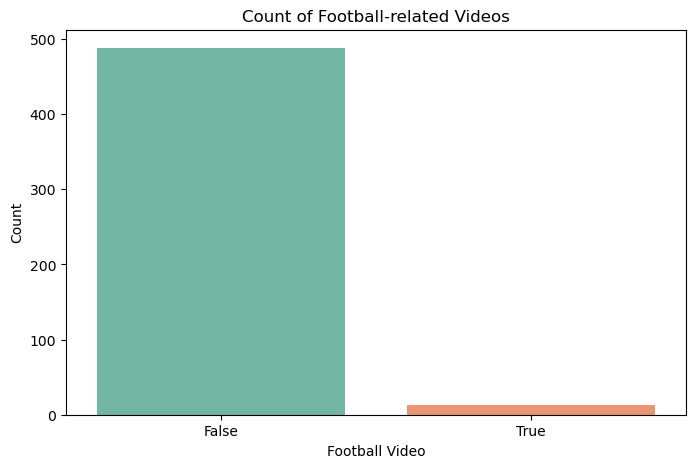

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Football Video', data=df_statistics, palette='Set2')
plt.title('Count of Football-related Videos')
plt.xlabel('Football Video')
plt.ylabel('Count')
plt.show()

Actual Count of Among Us Videos: 71


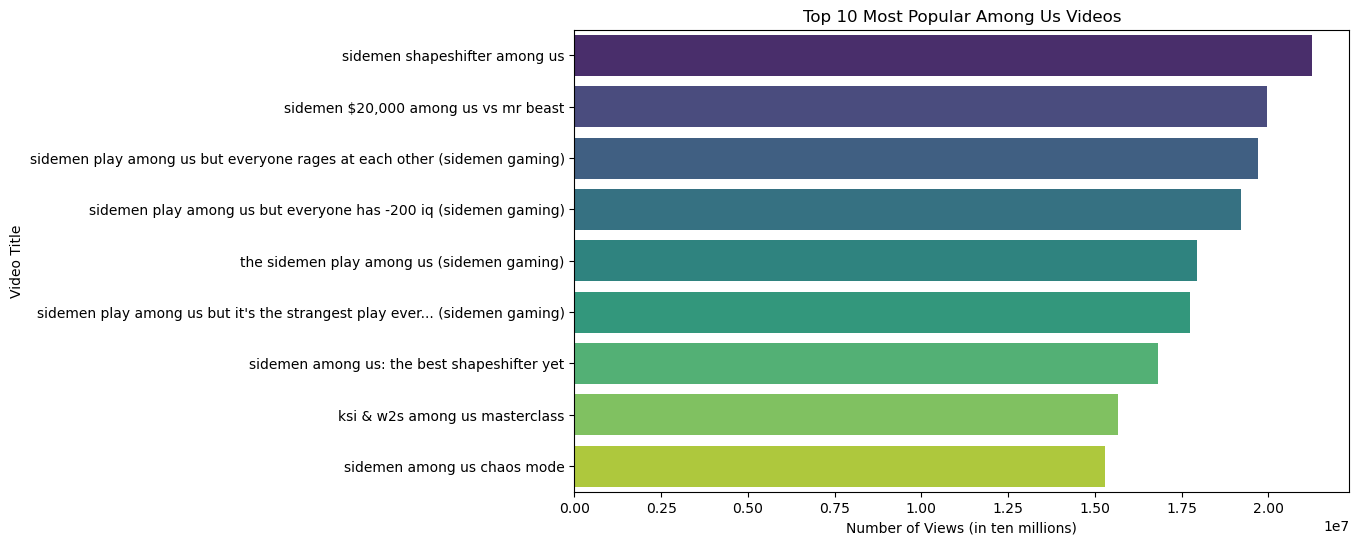

In [32]:
# Text Analysis to identify Among Us-related videos
amongus_keywords = ['among us']

# Create a new column indicating whether the title contains Among Us-related keywords
df_statistics['Among Us'] = df_statistics['Title'].apply(lambda title: any(keyword in title.lower() for keyword in amongus_keywords))

# Display the actual count of Among Us videos
total_among_us_videos = df_statistics['Among Us'].sum()
print("Actual Count of Among Us Videos:", total_among_us_videos)

# Display the top 10 most popular Among Us videos using a bar plot
top_among_us_videos = df_statistics[df_statistics['Among Us']].nlargest(10, 'Views')
plt.figure(figsize=(10, 6))
sns.barplot(x='Views', y='Title', data=top_among_us_videos, palette='viridis')
plt.title('Top 10 Most Popular Among Us Videos')
plt.xlabel('Number of Views (in ten millions)')
plt.ylabel('Video Title')
plt.show()


Top 20 most frequent words in video titles:
sidemen      457
gaming        61
gta           47
ksi           41
challenge     37
vs            32
play          27
pro           26
clubs         23
game          21
best          20
000           18
guess         18
golf          14
10            13
fifa          13
christmas     13
harry         12
guys          12
fall          12
dtype: int64


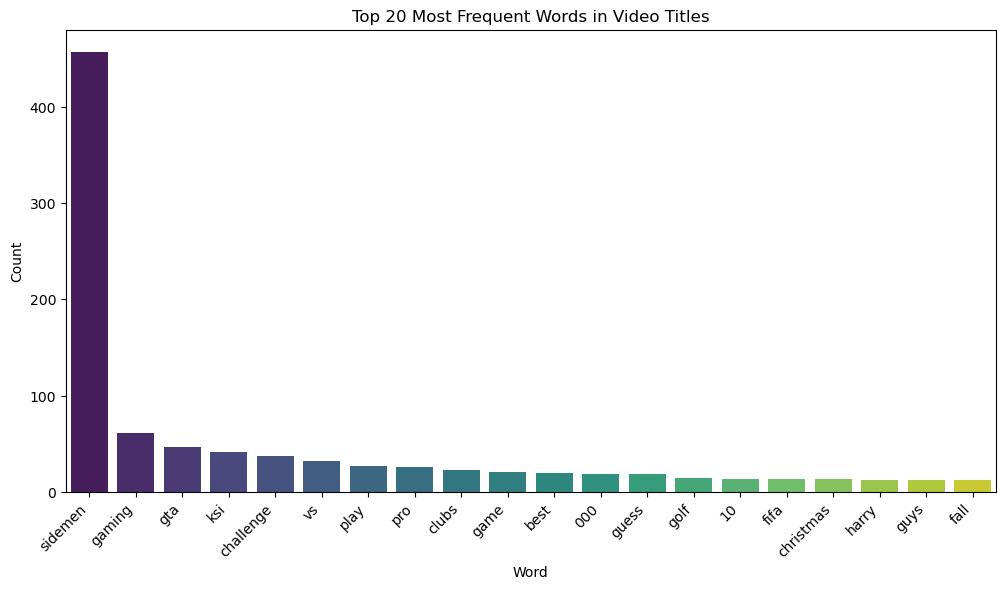

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize words in titles
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
title_words = vectorizer.fit_transform(df_statistics['Title'])

# Get the count of each unique word in titles
word_counts = pd.DataFrame(title_words.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the counts across all titles
total_word_counts = word_counts.sum()

# Display the top 20 most frequent words
top_words = total_word_counts.sort_values(ascending=False).head(20)
print("Top 20 most frequent words in video titles:")
print(top_words)

# Bar plot for the top 20 most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')
plt.title('Top 20 Most Frequent Words in Video Titles')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


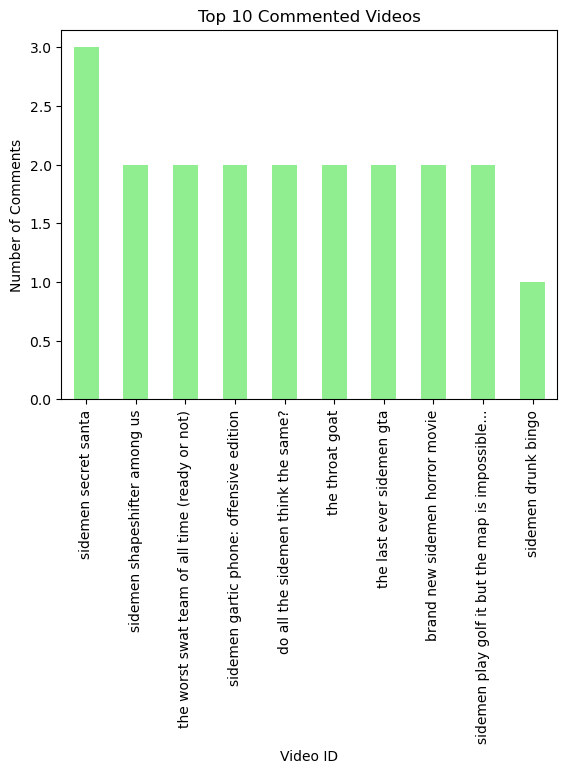

In [35]:
# Top Commented Videos
top_commented_videos = df_statistics['Title'].value_counts().nlargest(10)
top_commented_videos.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Commented Videos')
plt.xlabel('Video ID')
plt.ylabel('Number of Comments')
plt.show()


In [36]:
print(df_comments.isnull().sum())

Video ID      0
Comment       0
Author        0
Like Count    0
dtype: int64


In [37]:
df_comments['Comment'] = df_comments['Comment'].str.lower()

In [38]:
df_comments['Comment'] = df_comments['Comment'].str.replace('[^\w\s]', '')

In [39]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49253 entries, 0 to 49252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Video ID    49253 non-null  object
 1   Comment     49253 non-null  object
 2   Author      49253 non-null  object
 3   Like Count  49253 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [40]:
df_comments.head()

,Video ID,Comment,Author,Like Count
0,VeRPzUT4Qv0,nice to see harry took his own advice and went...,@raidenmlbb01,3997
1,VeRPzUT4Qv0,i really love how vik is getting more and more...,@coolavintheuck,171
2,VeRPzUT4Qv0,was very curious how among us clubs would've w...,@TheGamingBuddhaYT,1803
3,VeRPzUT4Qv0,vik is dipping out of every video😂,@nba2kswiss770,932
4,VeRPzUT4Qv0,vik on keyboard is too funny,@seanhoran5440,1388


In [41]:
df_comments['Comment'] = df_comments['Comment'].astype(str)

In [42]:
df_comments = pd.merge(df_comments, df_statistics[['Video ID', 'Title']], on='Video ID', how='left')

In [43]:
df_comments.head()

,Video ID,Comment,Author,Like Count,Title
0,VeRPzUT4Qv0,nice to see harry took his own advice and went...,@raidenmlbb01,3997,sidemen pro clubs but there’s an imposter
1,VeRPzUT4Qv0,i really love how vik is getting more and more...,@coolavintheuck,171,sidemen pro clubs but there’s an imposter
2,VeRPzUT4Qv0,was very curious how among us clubs would've w...,@TheGamingBuddhaYT,1803,sidemen pro clubs but there’s an imposter
3,VeRPzUT4Qv0,vik is dipping out of every video😂,@nba2kswiss770,932,sidemen pro clubs but there’s an imposter
4,VeRPzUT4Qv0,vik on keyboard is too funny,@seanhoran5440,1388,sidemen pro clubs but there’s an imposter


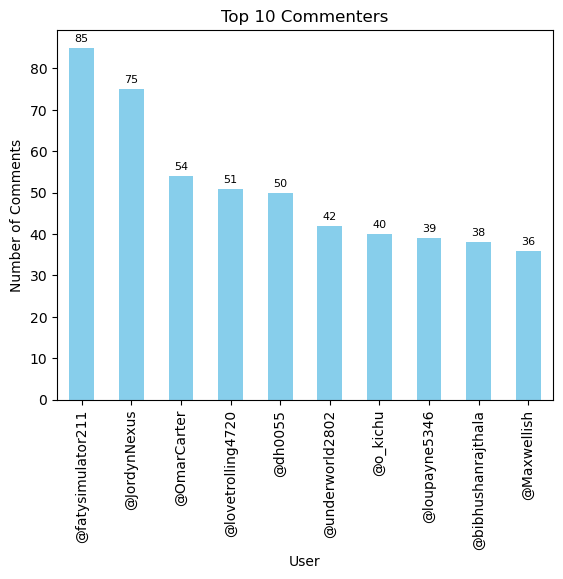

In [44]:
top_commenters = df_comments['Author'].value_counts().nlargest(10)
top_commenters.plot(kind='bar', color='skyblue')
plt.title('Top 10 Commenters')
plt.xlabel('User')
plt.ylabel('Number of Comments')
for i, value in enumerate(top_commenters):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=8)
plt.show()


/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


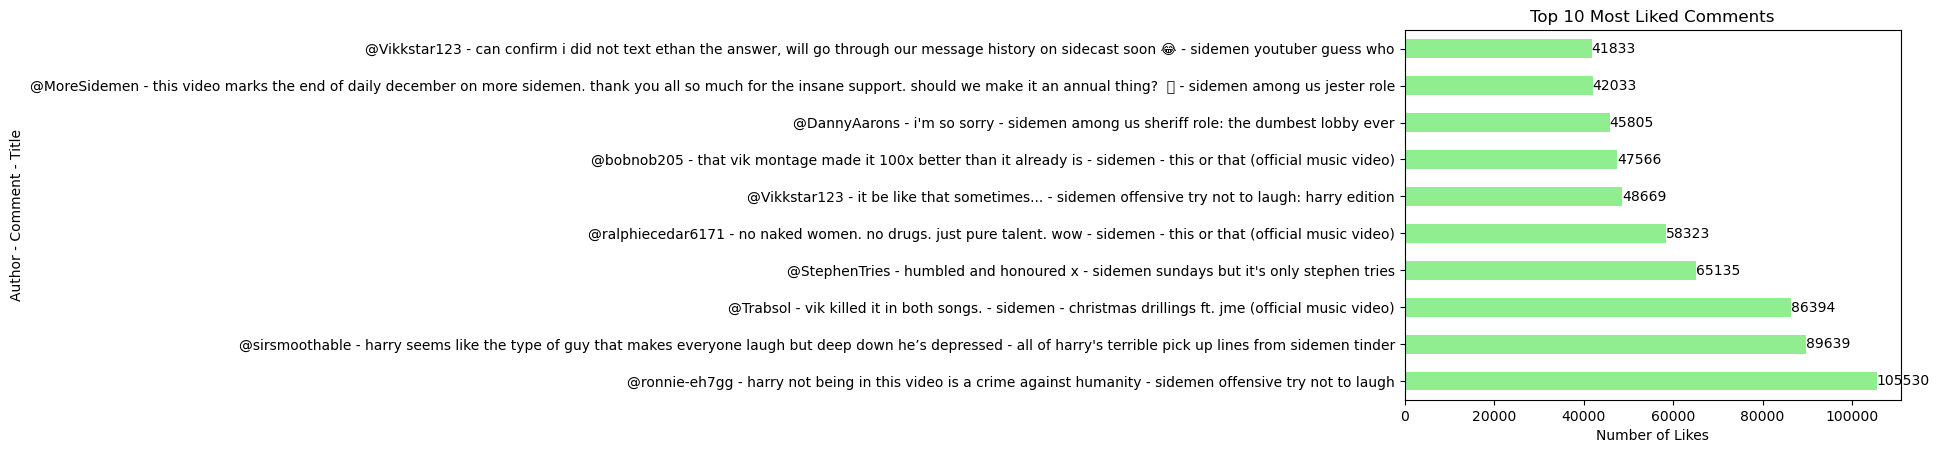

In [46]:
most_liked_comments = df_comments.nlargest(10, 'Like Count')

# Create a new column combining 'Author', 'Comment', and 'Title' for display
most_liked_comments['Author - Comment - Title'] = most_liked_comments['Author'] + ' - ' + most_liked_comments['Comment'] + ' - ' + most_liked_comments['Title']

# Plot the horizontal bar chart
ax = most_liked_comments.plot(y='Like Count', x='Author - Comment - Title', kind='barh', color='lightgreen', legend=False)
plt.title('Top 10 Most Liked Comments')
plt.xlabel('Number of Likes')
plt.ylabel('Author - Comment - Title')

# Add text annotations
for index, value in enumerate(most_liked_comments['Like Count']):
    ax.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()

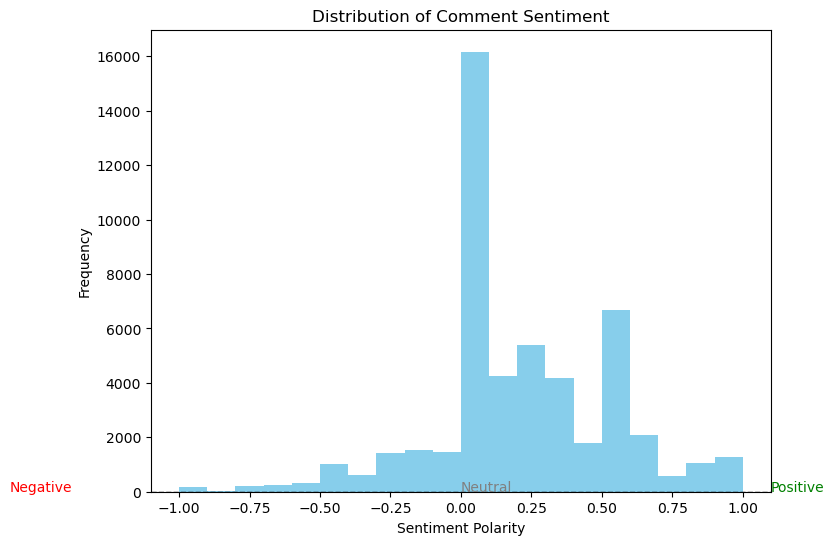

In [47]:
from textblob import TextBlob

# Sentiment Analysis
df_comments['Sentiment'] = df_comments['Comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8, 6))
plt.hist(df_comments['Sentiment'], bins=20, color='skyblue')
plt.title('Distribution of Comment Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Information Bar
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.text(1.1, 10, 'Positive', fontsize=10, color='green')
plt.text(-1.6, 10, 'Negative', fontsize=10, color='red')
plt.text(0, 10, 'Neutral', fontsize=10, color='gray')

plt.show()


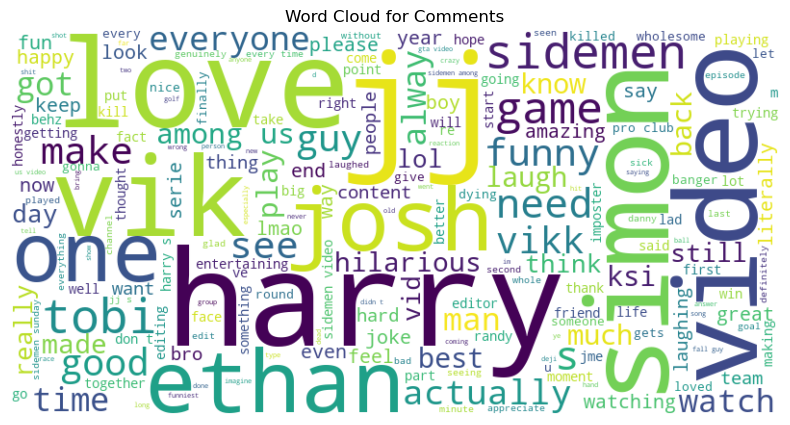

In [48]:
from wordcloud import WordCloud

# Word Cloud for Comments
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_comments['Comment']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()

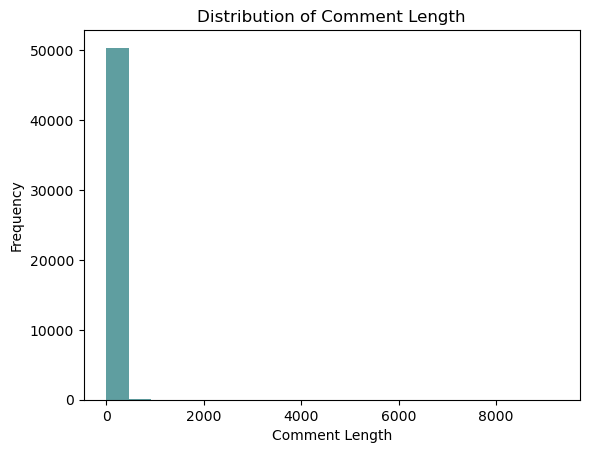

In [49]:
# Comment Length Analysis
df_comments['Comment Length'] = df_comments['Comment'].apply(lambda x: len(str(x)))
df_comments['Comment Length'].plot(kind='hist', bins=20, color='cadetblue')
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


          Like Count     Sentiment  Comment Length
count   50453.000000  50453.000000    50453.000000
mean      538.137256      0.198640       76.662993
std      2084.892712      0.326037       67.307467
min         0.000000     -1.000000        1.000000
25%         1.000000      0.000000       47.000000
50%         5.000000      0.166667       66.000000
75%        81.000000      0.440000       92.000000
max    105530.000000      1.000000     9251.000000


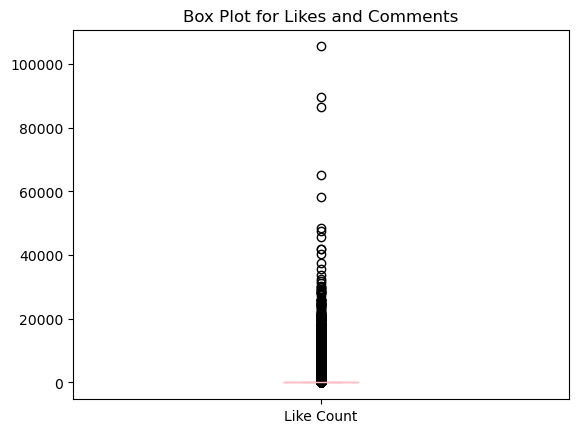

In [50]:
# Statistical Summaries
comment_stats = df_comments.describe()
print(comment_stats)

# Box Plot
df_comments[['Like Count', 'Comment']].plot(kind='box', color='pink')
plt.title('Box Plot for Likes and Comments')
plt.show()
